# Optimization Tutorial

## Stochastic Gradient Descent

In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x): return a*x + b

In [3]:
a=3.
b=8.
n=30
x = random(n)
y = lin(a, b, x)

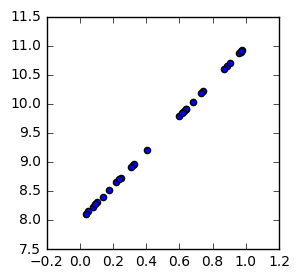

In [4]:
plt.scatter(x, y)

In [5]:
def sse(y, y_pred): return ((y-y_pred)**2).sum()
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)

In [6]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.1116

In [7]:
lr=0.01

Now, let's pause a bit and find the derivatives of the avg_loss
To minimize avg_loss <==> min sse
\\[
\frac{\partial sse}{\partial b} = 2(y-ax-b)(-1) = 2*(\text{y_pred} - y)
\\]

\\[
\frac{\partial sse}{\partial a} = 2(y-ax-b)(-x) =dydb*x
\\]

In [8]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [9]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

# For Mac and anaconda users: if got errir: “No MovieWriters Available”
# run: conda install -c conda-forge ffmpeg
# restart your jupyter notebook